# Digit Recognizer

Bu projemizde el yazısıyla yazılmış rakamları tahmin eden bir model geliştireceğiz.

<img src="https://www.kaggle.com/competitions/3004/images/header" width="1000">

<a href="https://www.kaggle.com/competitions/digit-recognizer/data">Dataya  Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("train.csv")

In [3]:
# Verilerimiz piksel şeklinde 

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
etiket=df["label"]

In [8]:
# Veriyi resim olarak gösterme için sadece piksel bilgilerinin oldugu bir veri olusturduk
piksel=df.drop("label", axis=1)

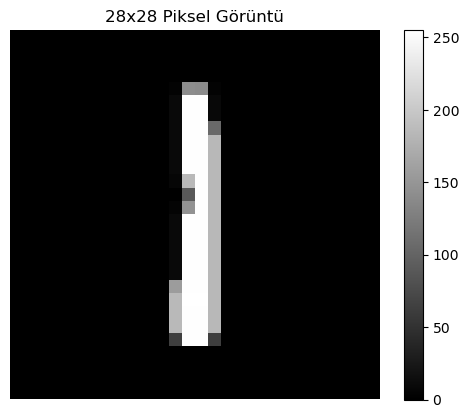

In [9]:
image = piksel.iloc[2].values.reshape(28, 28)

# Görselleştirme
plt.imshow(image, cmap='gray', vmin=0, vmax=255)  # Gri tonlama
plt.colorbar()  # Renk çubuğu ekleme
plt.title("28x28 Piksel Görüntü")
plt.axis('off')  # Eksenleri gizle
plt.show()

In [10]:
x=df.drop("label", axis=1)
y=df["label"]

In [11]:
x = []

# Her bir resmi döngüye alarak işlem yapma
for i in range(len(piksel)):
    img = piksel.iloc[i].values.reshape(28, 28)  # Series'i NumPy dizisine dönüştür ve yeniden şekillendir
    img = img / 255.0  # Normalizasyon
    x.append(img)  # Listeye ekle

In [12]:
x = np.array(x)
y = etiket

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [14]:
# Verilerimizi 2 boyutlu hale getirdik
x_train = np.stack((x_train,)*2, axis=-1)  # (num_samples, 28, 28, 2)
x_test = np.stack((x_test,)*2, axis=-1)  

In [15]:
from keras.models import Sequential

In [16]:
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [17]:
model=Sequential()
model.add(Input(shape=(28,28,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Burada 'rate' parametresini belirtiyoruz
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Dense(10, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,verbose=1)

Epoch 1/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8868 - loss: 0.4163 - val_accuracy: 0.9719 - val_loss: 0.1036
Epoch 2/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9609 - loss: 0.1529 - val_accuracy: 0.9795 - val_loss: 0.0759
Epoch 3/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9695 - loss: 0.1079 - val_accuracy: 0.9831 - val_loss: 0.0559
Epoch 4/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9758 - loss: 0.0808 - val_accuracy: 0.9848 - val_loss: 0.0524
Epoch 5/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9761 - loss: 0.0782 - val_accuracy: 0.9821 - val_loss: 0.0573
Epoch 6/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9764 - loss: 0.0772 - val_accuracy: 0.9838 - val_loss: 0.0493
Epoch 7/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9790 - loss: 0.0664 - val_accuracy: 0.9861 - val_loss: 0.0498
Epoch 8/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9794 - loss: 0.0676 - 

In [19]:
model.save("model.h5")

### Tahmin

In [20]:
test=pd.read_csv("test.csv")

In [21]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
tahmin=pd.DataFrame()

In [ ]:
import numpy as np

# Örnek tahmin yapmak için test DataFrame'ini kullanıyoruz
# test, (num_samples, 784) şeklinde olmalı

tahmin = {"ImageId": [], "label": []}

for i in range(len(test)):  # test DataFrame'indeki her resim için döngü
    img = test.iloc[i].values.reshape(28, 28)  # 784 pikseli 28x28'e dönüştür
    img = img / 255.0  # Normalizasyon

    # İki kanallı hale getir
    img_2channel = np.stack((img,)*2, axis=-1)  # (28, 28, 2)

    # Modeli tahmin yapma
    prediction = model.predict(np.expand_dims(img_2channel, axis=0))  # (1, 28, 28, 2) şeklinde olması gerekiyor

    tahmin["ImageId"].append(i)
    tahmin["label"].append(np.argmax(prediction, axis=1)[0])  # Tahmin edilen sınıfı ekle

# Tahmin sonuçlarını inceleme
print(tahmin)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

Modelimizi eğitip Kaggle.com a tahminlerimizi yukledik 0,98589% puan aldık. Ve mdoelimizi bir streamlit uygulaması yapmak uzere kaydettik.